<!-- 
Author: Krishnakanth Alagiri <https://thekrishna.in/>
GitHub: https://github.com/bearlike
Title: CBSE Class 12 - Working with Python and MySQL
!-->

# MySQL Connectivity in Python
Intended for CBSE Class 12 Students
<center>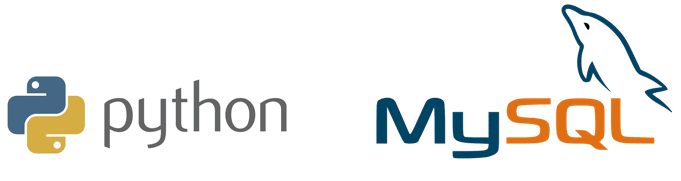</center>

## Increase readability in the notebook 🙈

<mark><b>I recommend you hide this cell since it's beyond the scope of your syllabus and can be confusing.</b></mark>

In [62]:
from IPython.display import HTML, display
# This function is specific to Jupyter notebooks and is beyond the scope of your syllabus 
def table(data: list):
    """ Displays a list as a HTML table in Jupyter notebooks
    Arguments:
        - data (list): A list that should be displayed as a table
    """
    display(HTML(
       '<table><tr>{}</tr></table>'.format(
           '</tr><tr>'.join(
               '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
           )
    ))

<h2 style="color:blue">String Formatting ✏️ (Prerequisite)</h2>

Here is the basic syntax for the `str.format()` method:

`"template string {}".format(arguments)`

Inside the template string, we can use `{}` which act as placeholders for the arguments. You might need to work with some commands through  

In [2]:
name = "Krishna"
print("Hello, {}. You are {}".format(name, "awesome"))

Hello, Krishna. You are awesome


## Importing the necessary packages 📦

In [3]:
# This command executed in your system terminal will install the mysql-connector.
!pip install -q mysql-connector-python

In [4]:
import mysql.connector

## Establishing the connection 🔌

The hostname of our database is `mysql-server` using the default port `3306`. We'll be using `root` user whose password is `0000` (not a secure password but still). We will be using the [`sakila` database](https://dev.mysql.com/doc/sakila/en/).

In [8]:
conn = mysql.connector.connect(
   user='root', password='0000', host='mysql-server', database='sakila'
)

## Creating a cursor object using the `cursor()` method
The `MySQLCursor` of the `mysql-connector-python` package/library is used to communicate and execute queries on the MySQL database

In [9]:
cursor = conn.cursor()

## Execute SQL query using `cursor.execute()`

- Executes MySQL queries and store the retrieved records in the cursor object.
- **Syntax**: `<cursor_object>.execute(SQL_QUERY)`

In [72]:
# MySQL query is passed as a `string` argument to the below function  
cursor.execute("SELECT * FROM film_text;")

## Understanding `cursor.fetchall()`

- The `cursor.fetchall()` method retrieves all the rows from executed result set of a query and returns them as list of tuples. (If we execute this after retrieving few rows it returns the remaining ones).
- MySQL commands (such as SHOW and SELECT) that fetches data from a database can use this function.

In [73]:
rows = cursor.fetchall()
# Printing the first four elements in a list
print(rows[:4])

[(1, 'ACADEMY DINOSAUR', 'A Epic Drama of a Feminist And a Mad Scientist who must Battle a Teacher in The Canadian Rockies'), (2, 'ACE GOLDFINGER', 'A Astounding Epistle of a Database Administrator And a Explorer who must Find a Car in Ancient China'), (3, 'ADAPTATION HOLES', 'A Astounding Reflection of a Lumberjack And a Car who must Sink a Lumberjack in A Baloon Factory'), (4, 'AFFAIR PREJUDICE', 'A Fanciful Documentary of a Frisbee And a Lumberjack who must Chase a Monkey in A Shark Tank')]


In [74]:
# The above table can be better visualized below. 
table(rows[:4])

1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist who must Battle a Teacher in The Canadian Rockies
2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrator And a Explorer who must Find a Car in Ancient China
3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a Car who must Sink a Lumberjack in A Baloon Factory
4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumberjack who must Chase a Monkey in A Shark Tank


## Understanding `cursor.fetchone()`

- The `cursor.fetchone()` method retrieves the next row of a query result set and returns a single sequence, or `None` if no more rows are available.
- **TLDR**: Used to retrieve one result set at a time while `cursor.fetchall()` retrieves everything from a query result set.

In [80]:
# This query lists all Databases from a MySQL database server.
cursor.execute("SHOW DATABASES;")
row = cursor.fetchone()

# This loop runs until cursor.fetchone() is None
# which means no more rows are left to be returned.
while row is not None:
    # row is a tuple, row[0] is an element in a tuple
    print(row[0])
    row = cursor.fetchone()

backups
classicmodels
information_schema
mysql
performance_schema
sakila
sys


# Examples 📚

### Display `email` of `STAFF` whose `first_name`(s) are given as a list

In [89]:
# List of names for which email(s) has to be returned
names = ["Mike", "Jon"]

conn = mysql.connector.connect(user='root', password='0000', host='mysql-server', database='sakila')
cursor = conn.cursor()

for name in names:
    cursor.execute("SELECT email FROM staff WHERE first_name='{}';".format(name))
    row = cursor.fetchone()

    while row is not None:
        print(row)
        row = cursor.fetchone()

('Mike.Hillyer@sakilastaff.com',)
('Jon.Stephens@sakilastaff.com',)
